In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to range [-1, 1]
])

# Download the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/dan/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /home/dan/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/dan/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/dan/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/dan/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/dan/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting /home/dan/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/dan/.pytorch/MNIST_data/MNIST/raw



In [2]:
dataset1 = []
dataset2 = []
dataset3 = []
dataset4 = []
dataset5 = []
dataset6 = []
dataset7 = []
dataset8 = []
dataset9 = []
dataset10 = []

for i in range(6000):
    
    dataset1.append(trainset[i])
    
for i in range(6000, 12000):
    
    dataset2.append(trainset[i])
    
for i in range(12000, 18000):
    
    dataset3.append(trainset[i])
    
for i in range(18000, 24000):
    
    dataset4.append(trainset[i])
    
for i in range(24000, 30000):
    
    dataset5.append(trainset[i])
for i in range(30000, 36000):
    
    dataset6.append(trainset[i])
    
for i in range(36000, 42000):
    
    dataset7.append(trainset[i])
    
for i in range(42000, 48000):
    
    dataset8.append(trainset[i])
    
for i in range(48000, 54000):
    
    dataset9.append(trainset[i])
    
for i in range(54000, 60000):
    
    dataset10.append(trainset[i])
    
    

In [3]:
batch_size = 64

# load the training data
trainloader1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=False)
trainloader2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)
trainloader3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size, shuffle=False)
trainloader4 = torch.utils.data.DataLoader(dataset4, batch_size=batch_size, shuffle=False)
trainloader5 = torch.utils.data.DataLoader(dataset5, batch_size=batch_size, shuffle=False)
trainloader6 = torch.utils.data.DataLoader(dataset6, batch_size=batch_size, shuffle=False)
trainloader7 = torch.utils.data.DataLoader(dataset7, batch_size=batch_size, shuffle=False)
trainloader8 = torch.utils.data.DataLoader(dataset8, batch_size=batch_size, shuffle=False)
trainloader9 = torch.utils.data.DataLoader(dataset9, batch_size=batch_size, shuffle=False)
trainloader10 = torch.utils.data.DataLoader(dataset10, batch_size=batch_size, shuffle=False)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()


# get some random training images
#dataiter = iter(trainloader)
#images, labels = next(dataiter)

# show images
#imshow(torchvision.utils.make_grid(images))

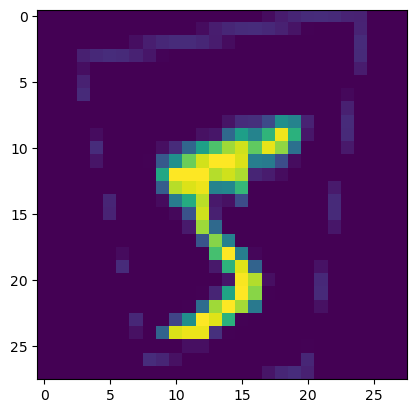

In [50]:
from torchvision.transforms import v2

def apply_perspective_transform(image):


    mean = torch.mean(image)
    std = torch.std(image)

    perspective_transform = v2.Compose([
        v2.RandomPerspective(distortion_scale=0.6, p=1.0, fill=-1),
        v2.ToDtype(torch.float32, scale=True),
        #v2.Normalize(mean=[mean], std=[std]),
    ])

    transformed_image = perspective_transform(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image


out = apply_transform(dataset1[0][0])


imshow(out)

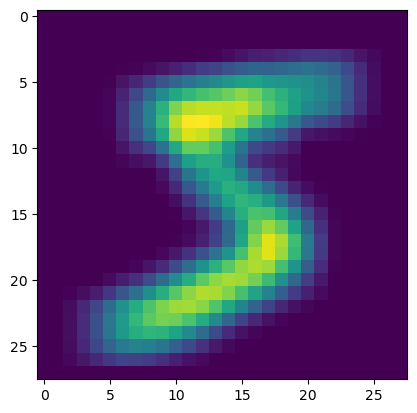

In [72]:
def apply_blur(image):


    blurrer = v2.GaussianBlur(kernel_size=5, sigma=(1, 5.))

    transformed_image = blurrer(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image


out = apply_blur(dataset1[0][0])


imshow(out)

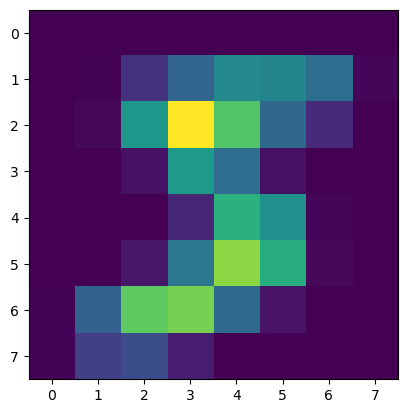

In [88]:

v2.ScaleJitter(target_size=(28,28))

def apply_scale_jitter(image):


    jitter = v2.ScaleJitter(target_size=(28,28))

    transformed_image = jitter(image)
    transformed_image = transformed_image.reshape(transformed_image.shape[1],transformed_image.shape[2])

    return transformed_image


out = apply_scale_jitter(dataset1[0][0])


imshow(out)

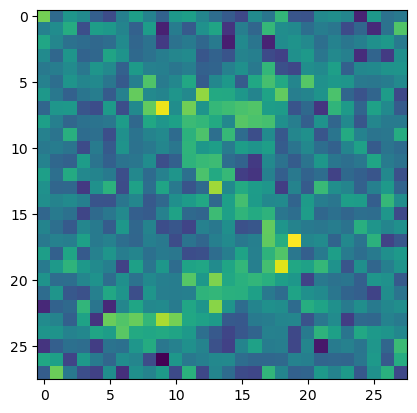

In [99]:
def apply_gaussian_noise(image):

    noise = np.random.normal(size=(28,28))

    transformed_image = image + noise
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_gaussian_noise(dataset1[0][0])


imshow(out)

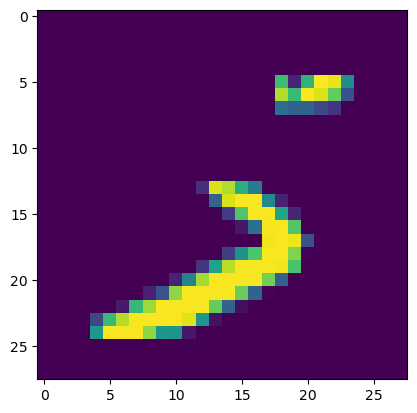

In [110]:
def apply_random_erase(image):


    erase = v2.RandomErasing(value=-1)

    transformed_image = erase(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_random_erase(dataset1[0][0])


imshow(out)

In [5]:
# Download and load the testset
testset = datasets.MNIST('~/.pytorch/MNIST_data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True)

NameError: name 'trainloader' is not defined